# VacationPy
---

## Starter Code to Import Libraries and Load the Weather and Coordinates Data

In [3]:
# Dependencies and Setup
import hvplot.pandas
import pandas as pd
import requests

# Import API key
from api_keys import geoapify_key

from requests.structures import CaseInsensitiveDict

In [4]:
# Load the CSV file created in Part 1 into a Pandas DataFrame
city_data_df = pd.read_csv("output_data/cities.csv")

# Display sample data
city_data_df.head()

,City_ID,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,0,punta arenas,-53.1500,-70.9167,3.06,87,20,2.06,CL,1723675105
1,1,papatowai,-46.5619,169.4708,13.24,60,100,6.19,NZ,1723675105
2,2,port alfred,-33.5906,26.8910,11.77,62,41,4.02,ZA,1723675105
3,3,badr hunayn,23.7829,38.7905,32.75,59,28,2.40,SA,1723675105
4,4,sidney,-33.8679,151.2073,15.73,94,75,5.66,AU,1723675089


---

### Step 1: Create a map that displays a point for every city in the `city_data_df` DataFrame. The size of the point should be the humidity in each city.

In [5]:
# !pip install selenium

In [21]:
%%capture --no-display

map_plot = city_data_df.hvplot.points('Lng',
            'Lat',
            geo=True, 
            tiles = 'OSM', 
            frame_width = 800, 
            frame_height = 500, 
            color='City',
            alpha=0.7,
            hover=True,
            hover_cols='all',
            use_index=False,
            s ='Humidity',
            scale= 1.2)


# Save the plot as a PNG image
hvplot.save(map_plot, 'output_data/city_locations_with_humidity1.html', fmt='html')

# Display the plot inline
map_plot


:Overlay
   .WMTS.I   :WMTS   [Longitude,Latitude]
   .Points.I :Points   [Lng,Lat]   (City,Humidity,City_ID,Max Temp,Cloudiness,Wind Speed,Country,Date)

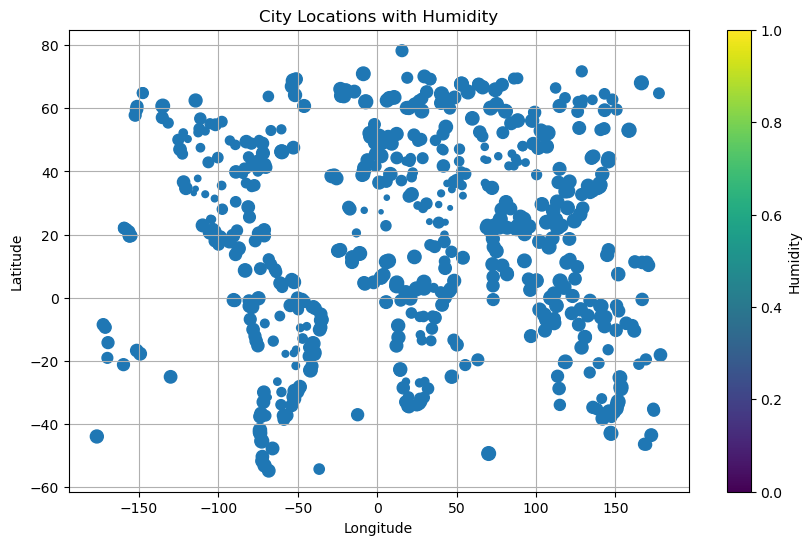

In [14]:
# Plot the data using matplotlib
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.scatter(city_data_df['Lng'], city_data_df['Lat'], s=city_data_df['Humidity'])
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('City Locations with Humidity')
plt.grid(True)
plt.colorbar(label='Humidity')
# Save the plot as a PNG image
plt.savefig('city_locations_with_humidity.png')

# Show the plot
plt.show()


In [ ]:
# %%capture --no-display
# import hvplot
# # Plot the map with points sized by humidity
# map_plot = city_data_df.hvplot.scatter(
#     x='Lng',
#     y='Lat',
#     geo=True,
#     tiles='CartoLight',
#     title='City Locations with Humidity',
#     hover_cols=['City', 'Country', 'Humidity'],  # Include 'Humidity' in hover information
#     size='Humidity',  # Use 'Humidity' column to determine point size
#     color='blue',  # Set color of points
#     alpha=0.7,  # Set transparency of points
#     width=800,  # Set width of the plot
#     height=500  # Set height of the plot
# )

# # Save the static version of the plot as a PNG image
# static_map_plot = map_plot.opts(tools=['hover'])
# hvplot.save(static_map_plot, 'output_data/city_locations_with_humidity.html')

# # Display the dynamic plot inline
# map_plot



In [ ]:
# %%capture --no-display

# import geoviews as gv
# import hvplot.pandas  # Import hvplot for GeoDataFrame plotting
# import holoviews as hv

# # Configure the map plot
# points = gv.Points(city_data_df, ['Lng', 'Lat'], ['Humidity'])

# # Customize the plot by setting the point size proportional to the humidity
# plot = points.opts(size='Humidity', cmap='Blues', colorbar=True, width=800, height=500, title='City Locations with Humidity')

# # Display the map
# display(plot)

# # Save the map as an HTML file
# hv.save(plot, 'city_locations_with_humidity.html')

# # Save the static version of the plot as a PNG image
# static_map_plot = map_plot.opts(tools=['hover'])
# hvplot.save(static_map_plot, 'output_data/city_locations_with_humidity1.html')

# # Display the dynamic plot inline
# map_plot



### Step 2: Narrow down the `city_data_df` DataFrame to find your ideal weather condition

In [23]:
# Narrow down cities that fit criteria
ideal_cities_df = city_data_df[(city_data_df['Max Temp'] > 21) & (city_data_df['Max Temp'] < 27) 
& (city_data_df['Wind Speed'] < 4.5) & (city_data_df['Cloudiness'] == 0) ]

# ideal_cities_df = city_data_df[city_data_df['Cloudiness'] == 0]


# Drop any rows with null values
# ideal_cities_df = ideal_cities_df.dropna()

# Display sample data
ideal_cities_df.head()


,City_ID,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
17,17,bethel,41.3712,-73.4140,26.22,68,0,1.54,US,1723675107
58,58,jamestown,42.0970,-79.2353,24.73,64,0,4.12,US,1723675114
96,96,pacific grove,36.6177,-121.9166,25.86,78,0,4.12,US,1723675120
155,155,darwin,-12.4611,130.8418,21.99,88,0,1.54,AU,1723675132
162,162,turkmenbasy,40.0222,52.9552,25.43,41,0,3.09,TM,1723675133


### Step 3: Create a new DataFrame called `hotel_df`.

In [24]:
# Use the Pandas copy function to create DataFrame called hotel_df to store the city, country, coordinates, and humidity
# copy of filterecities_df_copy
hotel_df = ideal_cities_df[['City', 'Country', 'Lat', 'Lng', 'Humidity']].copy()

# Add an empty column, "Hotel Name," to the DataFrame so you can store the hotel found using the Geoapify API
hotel_df["Hotel Name"] = ""

# Display sample data
hotel_df.head()

,City,Country,Lat,Lng,Humidity,Hotel Name
17,bethel,US,41.3712,-73.4140,68,
58,jamestown,US,42.0970,-79.2353,64,
96,pacific grove,US,36.6177,-121.9166,78,
155,darwin,AU,-12.4611,130.8418,88,
162,turkmenbasy,TM,40.0222,52.9552,41,


### Step 4: For each city, use the Geoapify API to find the first hotel located within 10,000 metres of your coordinates.

In [37]:
# Set up the base URL for the API request
base_url = "https://api.geoapify.com/v2/places"

# Iterate through the hotel_df DataFrame
for index, row in hotel_df.iterrows():
    # Get latitude and longitude from the DataFrame
    lat = row['Lat']
    lng = row['Lng']
    
    # Set filter and bias parameters with the current city's latitude and longitude
    filters = f"circle:{lng},{lat},{radius}"
    bias = f"proximity:{lng},{lat}"
    
    # Set up parameters dictionary
    params = {
        "categories": categories,
        "limit": limit,
        "filter": filters,
        "bias": bias,
        "apiKey": geoapify_key
    }
    
    # Make an API request using the params dictionary
    response = requests.get(base_url, params=params)

    # Convert the API response to JSON format
    name_address = response.json()
    
    # Extract hotel names from the response
    try:
        hotel_names = [feature["properties"]["name"] for feature in name_address["features"]]
        if hotel_names:
            hotel_df.loc[index, "Hotel Name"] = ", ".join(hotel_names)
        else:
            hotel_df.loc[index, "Hotel Name"] = "No hotel found"
    except (KeyError, IndexError):
        # If no hotel is found, set the hotel name as "No hotel found".
        hotel_df.loc[index, "Hotel Name"] = "No hotel found"
        
    # Log the search results
    print(f"{hotel_df.loc[index, 'City']} - nearest hotel: {hotel_df.loc[index, 'Hotel Name']}")

# Display sample data
hotel_df.head(15)


bethel - nearest hotel: Sal's Pizza
jamestown - nearest hotel: Landmark
pacific grove - nearest hotel: Petra Restaurant
darwin - nearest hotel: Mayberry
turkmenbasy - nearest hotel: Dostluk
chibougamau - nearest hotel: No hotel found
nantucket - nearest hotel: Black Eyed Susan's
lompoc - nearest hotel: Herb Home
mineiros - nearest hotel: Peixaria Vitória do Bi
paris - nearest hotel: Au Bougnat
rudsar - nearest hotel: مستر برگر
dongcun - nearest hotel: No hotel found
tolanaro - nearest hotel: Le Petit Bonheur
scituate - nearest hotel: Barker Tavern
san sebastian de la gomera - nearest hotel: Cuatro Caminos
larisa - nearest hotel: Παραμύθι
yigo village - nearest hotel: Hoa Mai Vietnamese Restaurant
stuttgart - nearest hotel: Valle Bar + Ristorante
barroquinha - nearest hotel: Restaurant
al bayda' - nearest hotel: مطعم باباي
kermanshah - nearest hotel: رستوران توکل


,City,Country,Lat,Lng,Humidity,Hotel Name
17,bethel,US,41.3712,-73.4140,68,Sal's Pizza
58,jamestown,US,42.0970,-79.2353,64,Landmark
96,pacific grove,US,36.6177,-121.9166,78,Petra Restaurant
155,darwin,AU,-12.4611,130.8418,88,Mayberry
162,turkmenbasy,TM,40.0222,52.9552,41,Dostluk
200,chibougamau,CA,49.9168,-74.3659,44,No hotel found
252,nantucket,US,41.2835,-70.0995,73,Black Eyed Susan's
257,lompoc,US,34.6391,-120.4579,78,Herb Home
266,mineiros,BR,-17.5694,-52.5511,24,Peixaria Vitória do Bi
278,paris,FR,48.8534,2.3488,78,Au Bougnat


### Step 5: Add the hotel name and the country as additional information in the hover message for each city in the map.

In [26]:
city_data_df.head(3)


,City_ID,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,0,punta arenas,-53.1500,-70.9167,3.06,87,20,2.06,CL,1723675105
1,1,papatowai,-46.5619,169.4708,13.24,60,100,6.19,NZ,1723675105
2,2,port alfred,-33.5906,26.8910,11.77,62,41,4.02,ZA,1723675105


In [27]:
hotel_df.head(3)

,City,Country,Lat,Lng,Humidity,Hotel Name
17,bethel,US,41.3712,-73.4140,68,Sal's Pizza
58,jamestown,US,42.0970,-79.2353,64,Landmark
96,pacific grove,US,36.6177,-121.9166,78,Petra Restaurant


In [40]:
radius = 10000
params = {
    "categories":"accommodation.hotel",
#     "bias":f'proximity:{row["LONGITUDE"]},{row["LATITUDE"]}',
    "apiKey":geoapify_key,    
    "limit":15,
#     "filter":f'circle:{row["LONGITUDE"]},{row["LATITUDE"]},{radius}',
}

#%%capture --no-display

hotel_map = hotel_df.hvplot.points('Lng',
            'Lat',
            geo=True, 
            tiles = 'OSM', 
            frame_width = 800, 
            frame_height = 500, 
            color='City',
            alpha=0.6,
            hover=True,
            hover_cols='all',
            use_index=False,
            s ='Humidity',
            scale= 1.2)

# Save the dynamic plot as an HTML file
hvplot.save(hotel_map, 'output_data/city_and_hotel_locations2.html')


# Display the dynamic plot inline
hotel_map


:Overlay
   .WMTS.I   :WMTS   [Longitude,Latitude]
   .Points.I :Points   [Lng,Lat]   (City,Humidity,Country,Hotel Name)